In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3

/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3


In [ ]:
ls

detr/  generate_panoptic_data.ipynb  Panoptic-DETR.ipynb


In [ ]:
!git clone https://github.com/facebookresearch/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 260, done.
remote: Total 260 (delta 0), reused 0 (delta 0), pack-reused 260
Receiving objects: 100% (260/260), 12.85 MiB | 13.49 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [ ]:
cd detr

/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr


In [ ]:
ls

bbox_output/    datasets/   LICENSE    requirements.txt      util/
coco/           Dockerfile  main.py    run_with_submitit.py
coco_panoptic/  engine.py   models/    test_all.py
d2/             hubconf.py  README.md  tox.ini


In [ ]:
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-rxkkcpan
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-rxkkcpan
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=3cd2a3e507934bfc379439e56781cc0e6ea862fe76948b5db4d7d6f3e8e6af76
  Stored in directory: /tmp/pip-ephem-wheel-cache-o7q6ih64/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
import torch
# Get pretrained weights
checkpoint = torch.hub.load_state_dict_from_url(
            url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth',
            map_location='cpu',
            check_hash=True)

# Remove class weights
del checkpoint["model"]["class_embed.weight"]
del checkpoint["model"]["class_embed.bias"]

# Save
torch.save(checkpoint,
           'detr-r50_no-class-head.pth')

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


  0%|          | 0.00/159M [00:00<?, ?B/s]

# Training for Panoptic BBOX

In [ ]:
!python main.py \
--dataset_file "coco_panoptic" \
--coco_path "/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/coco" \
--coco_panoptic_path "/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/coco_panoptic" \
--output_dir "/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/bbox_output" \
--batch_size 2 \
--epochs 100 \
--num_classes 4 \
--resume "detr-r50_no-class-head.pth" \

In [ ]:
!python main.py \
--dataset_file "coco_panoptic" \
--coco_path "/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/coco" \
--coco_panoptic_path "/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/coco_panoptic" \
--output_dir "/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/bbox_output" \
--batch_size 2 \
--epochs 176 \
--lr .00002 \
--resume '/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/bbox_output/checkpoint.pth' \
--num_classes 4 \

Not using distributed mode
git:
  sha: 8a144f83a287f4d3fece4acdf073f387c5af387d, status: has uncommited changes, branch: main

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path='/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/coco_panoptic', coco_path='/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/coco', dataset_file='coco_panoptic', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=176, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=2e-05, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=4, num_queries=100, num_workers=2, output_dir='/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/bbox_output', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/content/gdrive/MyDr

In [2]:
cd /content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr

/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr


In [3]:
from util.plot_utils import plot_logs

from pathlib import Path

bbox_log_directory = [Path('/content/gdrive/MyDrive/Colab Notebooks/EVA7 Capstone/Part 3/detr/bbox_output')]

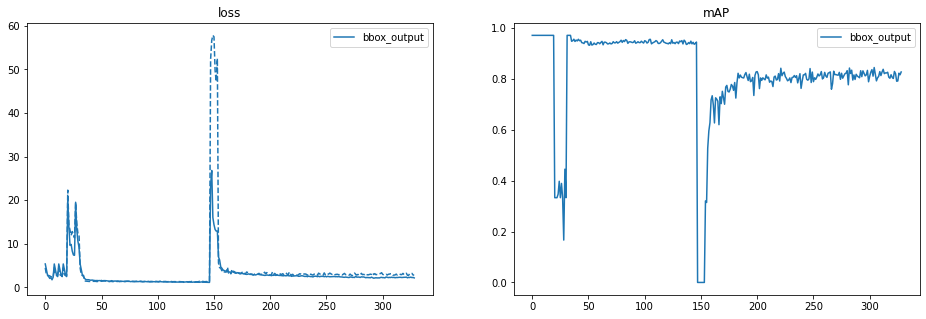

In [4]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(bbox_log_directory,
          fields_of_interest)

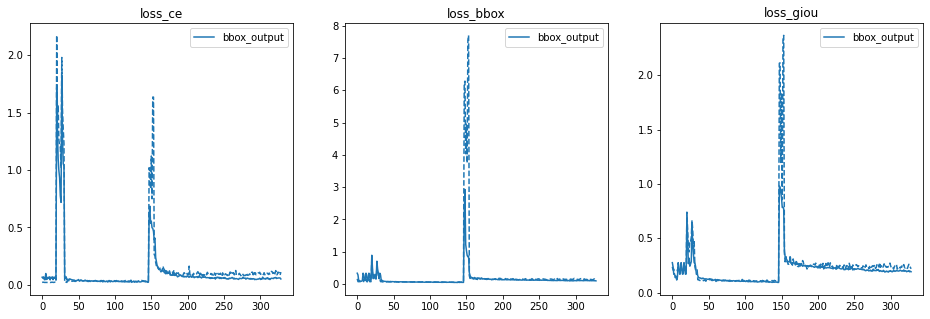

In [5]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
  
    
    )

plot_logs(bbox_log_directory,
          fields_of_interest)

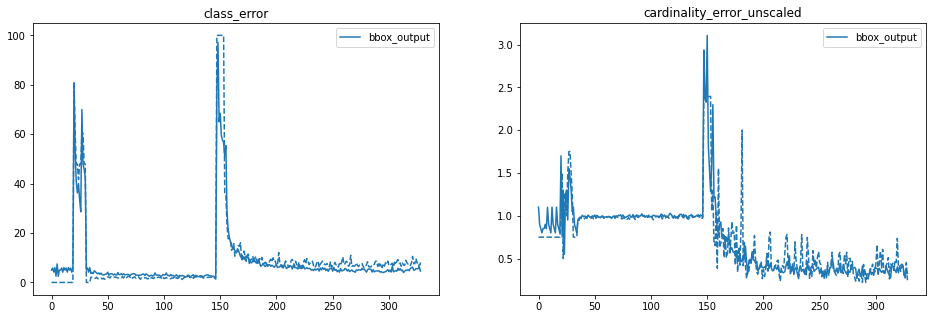

In [6]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(bbox_log_directory,
          fields_of_interest) 